In [42]:
import lightkurve as lk
import astropy as ap
%matplotlib inline

In [2]:
search_result = lk.search_tesscut('V0463 Cyg')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,TESScut,1426,V0463 Cyg,0.0
1,TESS Sector 41,2021,TESScut,475,V0463 Cyg,0.0
2,TESS Sector 40,2021,TESScut,475,V0463 Cyg,0.0
3,TESS Sector 54,2022,TESScut,475,V0463 Cyg,0.0
4,TESS Sector 55,2022,TESScut,475,V0463 Cyg,0.0


In [3]:
tpf = search_result[1].download(cutout_size=20)

In [4]:
target_mask = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

1

In [5]:
target_mask[9:12,9:12]=True
n_target_pixels = target_mask.sum()
n_target_pixels

9

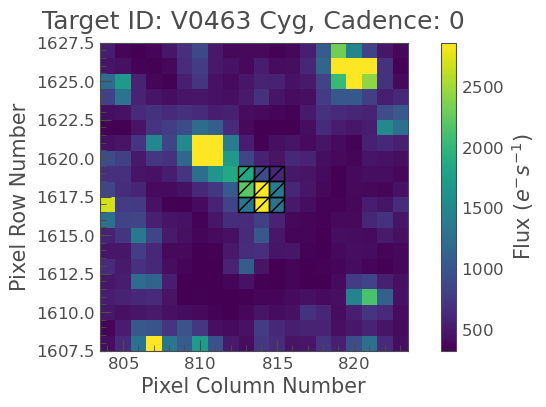

In [6]:
tpf.plot(aperture_mask=target_mask, mask_color='k');

In [7]:
tpf.animate()

In [8]:
lc=tpf.to_lightcurve()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

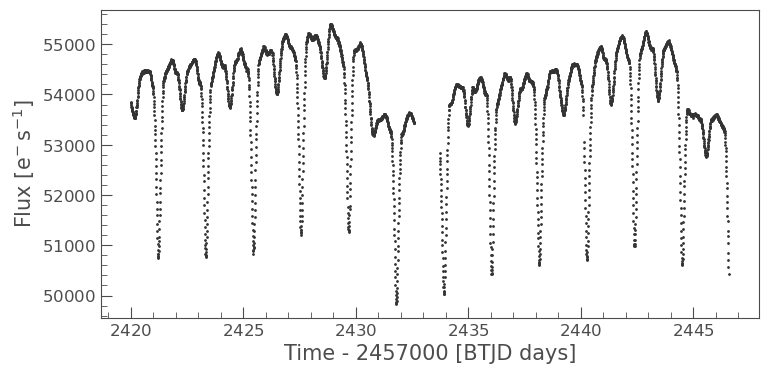

In [9]:
lc.scatter()

In [10]:
lcb=tpf.estimate_background()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,pix^{-1}\\,s^{-1}}$]'>

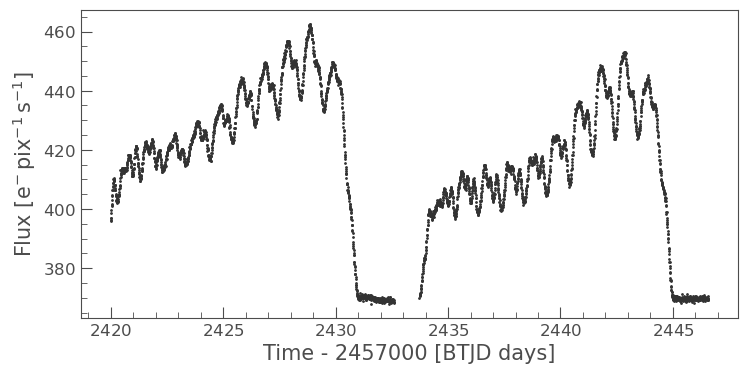

In [11]:
lcb.scatter()

In [52]:
lcc=lc - lcb.flux*ap.units.pix*n_target_pixels

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

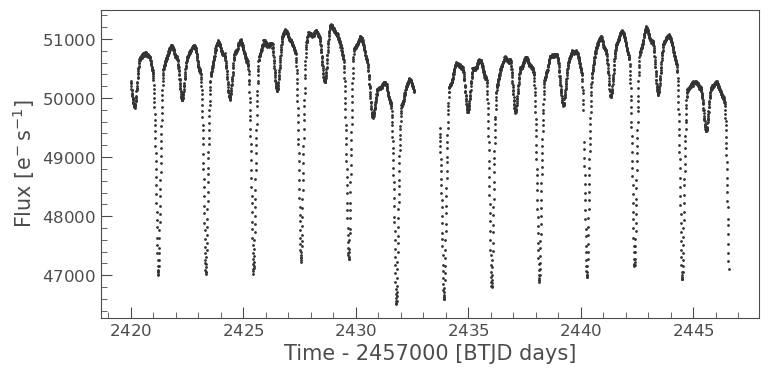

In [53]:
lcc.scatter()